In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TransBorderFreight_Data_Analysis/'
file_name ='combined_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(file_path+file_name, low_memory=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19587500 entries, 0 to 19587499
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       float64
 1   TRDTYPE          float64
 2   USASTATE         object 
 3   DEPE             object 
 4   DISAGMOT         float64
 5   MEXSTATE         object 
 6   CANPROV          object 
 7   COUNTRY          float64
 8   VALUE            float64
 9   SHIPWT           float64
 10  FREIGHT_CHARGES  float64
 11  DF               float64
 12  CONTCODE         object 
 13  MONTH            float64
 14  YEAR             float64
 15  COMMODITY2       float64
dtypes: float64(11), object(5)
memory usage: 2.3+ GB


In [ ]:
print("Missing values before filling:")
print(data.isnull().sum())

Missing values before filling:
Unnamed: 0         19587500
TRDTYPE                   0
USASTATE                  0
DEPE               11254882
DISAGMOT                  0
MEXSTATE           13345389
CANPROV             7558259
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                  6581717
CONTCODE                  0
MONTH                429456
YEAR                      0
COMMODITY2          8332618
dtype: int64


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data['QUARTER'] = data['MONTH'].apply(lambda month: (month - 1) // 3 + 1)

In [ ]:
data['TRDTYPE'] = data['TRDTYPE'].astype(np.int64)
data['DISAGMOT'] = data['DISAGMOT'].astype(np.int64)
data['COUNTRY'] = data['COUNTRY'].astype(np.int64)

In [ ]:
data.dropna(subset=['MONTH', 'QUARTER'], inplace=True)

data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
data['DEPE'].fillna('UNKNOWN', inplace=True) # Changing all nulls to 'UNKNOWN
data['COMMODITY2'].fillna(100, inplace=True) # 100 - (UNKNOWN)
print("\nMissing values after filling:")
print(data.isnull().sum())

/tmp/ipython-input-7-2428954577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DF'].fillna(3, inplace=True) # 3 - (UNKNOWN)
/tmp/ipython-input-7-2428954577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Missing values after filling:
TRDTYPE                   0
USASTATE                  0
DEPE                      0
DISAGMOT                  0
MEXSTATE           13062488
CANPROV             7387141
COUNTRY                   0
VALUE                     0
SHIPWT                    0
FREIGHT_CHARGES           0
DF                        0
CONTCODE                  0
MONTH                     0
YEAR                      0
COMMODITY2                0
QUARTER                   0
dtype: int64


In [ ]:
data['DF'] = data['DF'].astype(np.int64)
data['YEAR'] = data['YEAR'].astype(np.int64)
data['MONTH'] = data['MONTH'].astype(np.int64)
data['COMMODITY2'] = data['COMMODITY2'].astype(np.int64)
data['QUARTER'] = data['QUARTER'].astype(np.int64)

In [ ]:
data.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2,QUARTER
count,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07,1.915804e+07
mean,1.336657e+00,4.803841e+00,1.524616e+03,2.651384e+06,1.117269e+06,3.558964e+04,1.890034e+00,4.275678e+00,2.021615e+03,7.544601e+01,1.792717e+00
std,4.725666e-01,1.249288e+00,3.845201e+02,3.451349e+07,3.791482e+07,9.443481e+05,8.781731e-01,2.874910e+00,1.169779e+00,2.984534e+01,9.274372e-01
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.467500e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03,4.900000e+01,1.000000e+00
50%,1.000000e+00,5.000000e+00,1.220000e+03,7.216000e+04,0.000000e+00,2.500000e+02,2.000000e+00,4.000000e+00,2.022000e+03,8.800000e+01,2.000000e+00
75%,2.000000e+00,5.000000e+00,2.010000e+03,4.183800e+05,2.665000e+03,2.700000e+03,3.000000e+00,6.000000e+00,2.023000e+03,1.000000e+02,2.000000e+00
max,2.000000e+00,9.000000e+00,2.010000e+03,5.595625e+09,8.563936e+09,2.487214e+08,3.000000e+00,1.200000e+01,2.024000e+03,1.000000e+02,4.000000e+00


In [ ]:
data['COUNTRY'] =  data['COUNTRY'].astype(np.int64)
data['COUNTRY_NAME'] = data['COUNTRY'].apply(lambda x: 'Canada' if x == 1220 else 'Mexico')

## Q1: Which transportation modes are most frequently used for freight movement, and how has this changed over time?

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
disagmot_mapping = {
        1 : "Vessel",
        3 : "Air",
        4 : "Mail (U.S. Postal Service)",
        5 : "Truck",
        6 : "Rail",
        7 : "Pipeline",
        8 : "Other",
        9 : "Foreign Trade Zones (FTZs)",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['TRANSPORT_MODE'] = data['DISAGMOT'].map(disagmot_mapping)

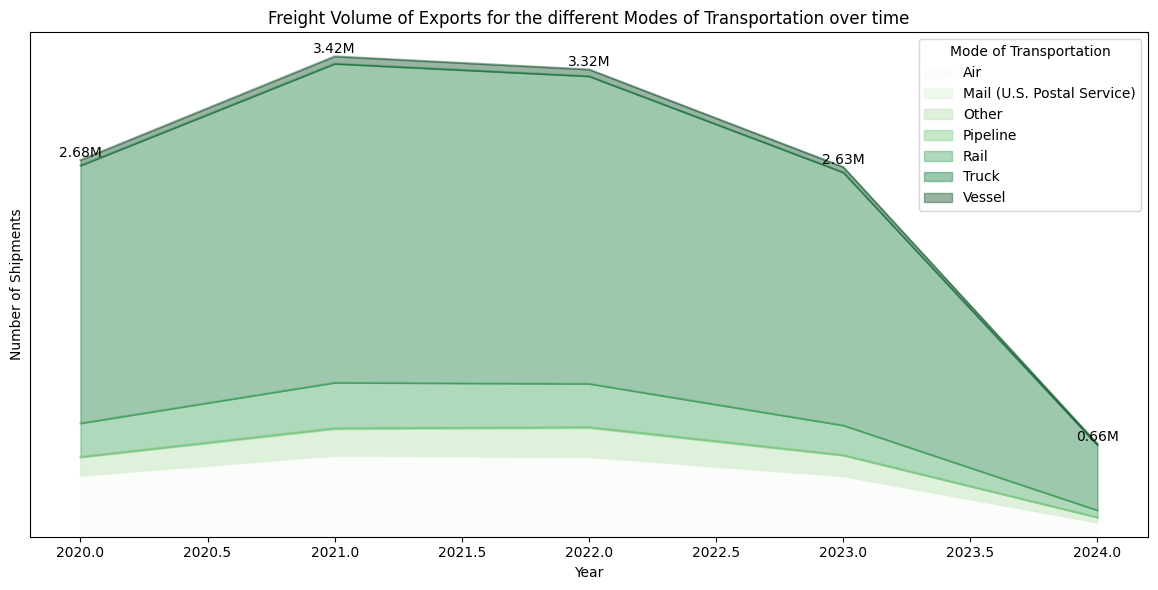

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]
filtered_data = filtered_data.groupby(['YEAR', 'TRANSPORT_MODE']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, cmap='Greens', ax=plt.gca())
plt.title('Freight Volume of Exports for the different Modes of Transportation over time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()

# Get the current axes
ax = plt.gca()

# remove the y-axis
ax.set_yticks([])

# Get the x and y coordinates of the stacked areas
x_coords = filtered_data.index
y_coords = filtered_data.values

# Add text labels at the top of each stack
for i in range(len(x_coords)):
    total_value = sum(y_coords[i])
    ax.text(x_coords[i], total_value, f'{total_value/1_000_000:.2f}M', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
disagmot_mapping = {
        1 : "Other",
        3 : "Air",
        4 : "Other",
        5 : "Truck",
        6 : "Other",
        7 : "Other",
        8 : "Other",
        9 : "Other",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['TRANSPORT_MODE_EXPORTS'] = data['DISAGMOT'].map(disagmot_mapping)

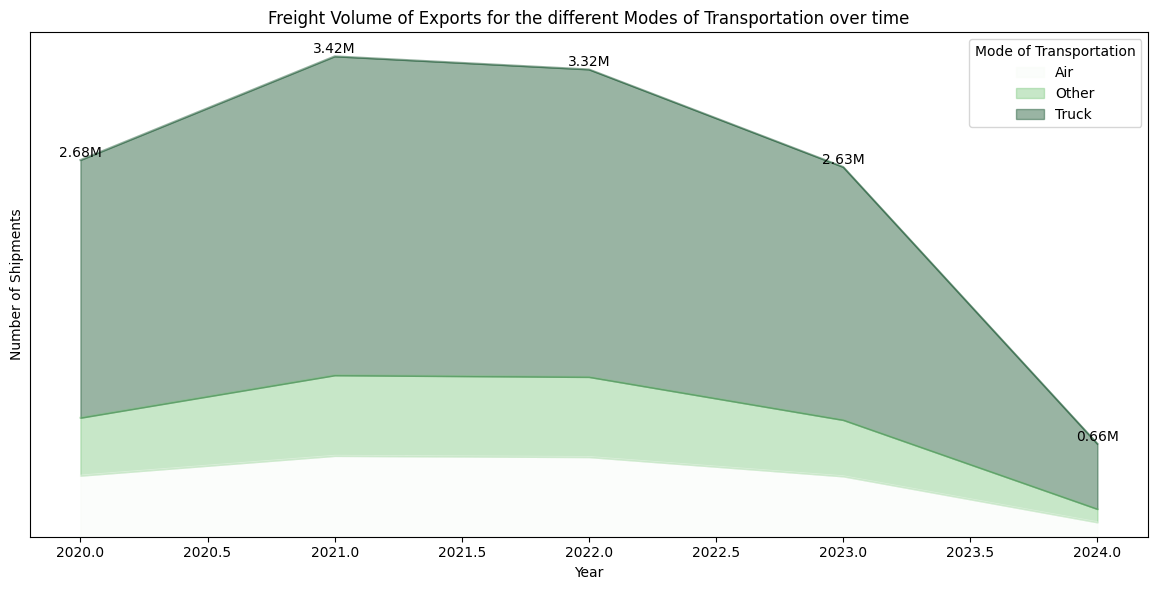

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]
filtered_data = filtered_data.groupby(['YEAR', 'TRANSPORT_MODE_EXPORTS']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, cmap='Greens', ax=plt.gca())
plt.title('Freight Volume of Exports for the different Modes of Transportation over time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()

# Get the current axes
ax = plt.gca()

# remove the y-axis
ax.set_yticks([])

# Get the x and y coordinates of the stacked areas
x_coords = filtered_data.index
y_coords = filtered_data.values

# Add text labels at the top of each stack
for i in range(len(x_coords)):
    total_value = sum(y_coords[i])
    ax.text(x_coords[i], total_value, f'{total_value/1_000_000:.2f}M', ha='center', va='bottom', fontsize=10)

plt.show()

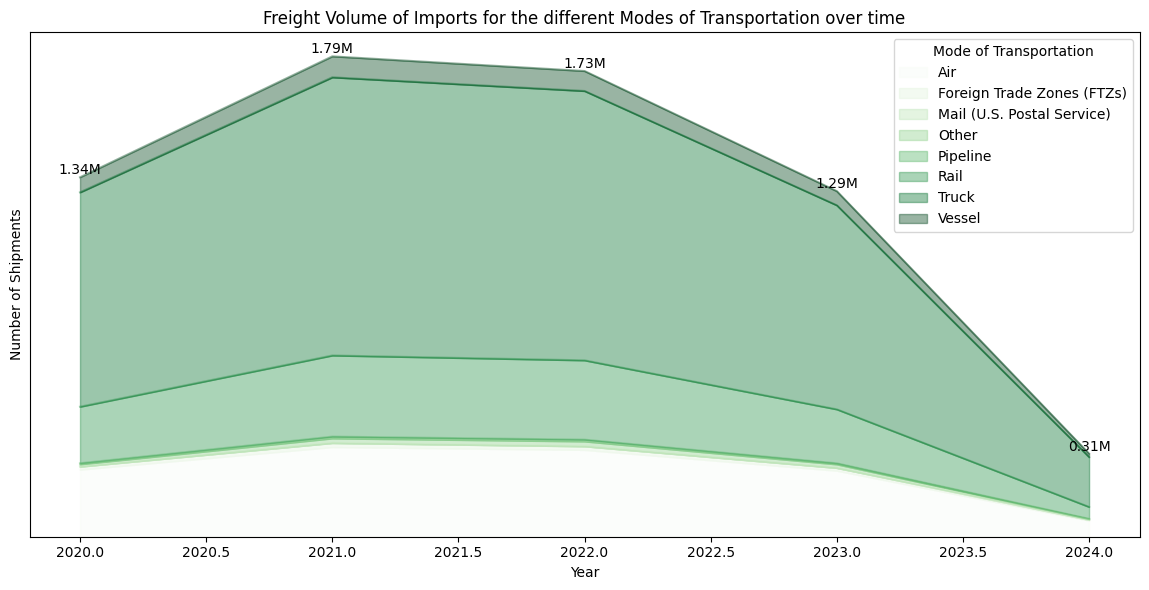

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = filtered_data.groupby(['YEAR', 'TRANSPORT_MODE']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, cmap='Greens', ax=plt.gca())
plt.title('Freight Volume of Imports for the different Modes of Transportation over time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()

# Get the current axes
ax = plt.gca()

# remove the y-axis
ax.set_yticks([])

# Get the x and y coordinates of the stacked areas
x_coords = filtered_data.index
y_coords = filtered_data.values

# Add text labels at the top of each stack
for i in range(len(x_coords)):
    total_value = sum(y_coords[i])
    ax.text(x_coords[i], total_value, f'{total_value/1_000_000:.2f}M', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
disagmot_mapping = {
        1 : "Other",
        3 : "Air",
        4 : "Other",
        5 : "Truck",
        6 : "Rail",
        7 : "Other",
        8 : "Other",
        9 : "Other",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['TRANSPORT_MODE_IMPORTS'] = data['DISAGMOT'].map(disagmot_mapping)

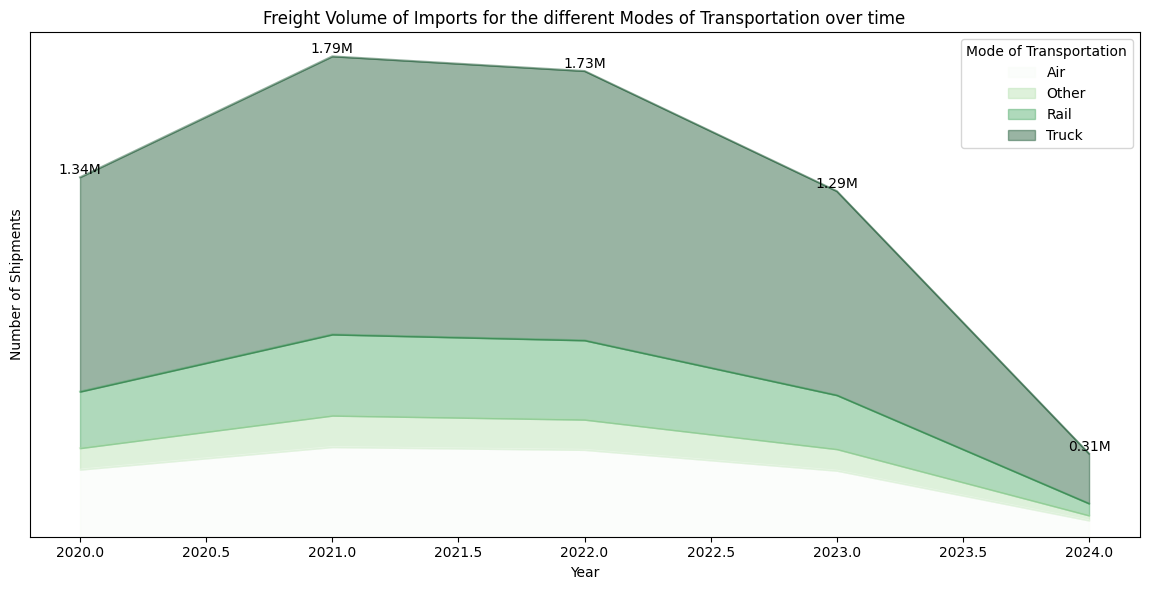

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]
filtered_data = filtered_data.groupby(['YEAR', 'TRANSPORT_MODE_IMPORTS']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
filtered_data.plot(kind='area', stacked=True, alpha=0.4, cmap='Greens', ax=plt.gca())
plt.title('Freight Volume of Imports for the different Modes of Transportation over time')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Mode of Transportation')
plt.tight_layout()

# Get the current axes
ax = plt.gca()

# remove the y-axis
ax.set_yticks([])

# Get the x and y coordinates of the stacked areas
x_coords = filtered_data.index
y_coords = filtered_data.values

# Add text labels at the top of each stack
for i in range(len(x_coords)):
    total_value = sum(y_coords[i])
    ax.text(x_coords[i], total_value, f'{total_value/1_000_000:.2f}M', ha='center', va='bottom', fontsize=10)

plt.show()

## Q2: What is the relationship between the Value of Goods, Freight Charges, and Ship Weight for both Exported and Imported Goods

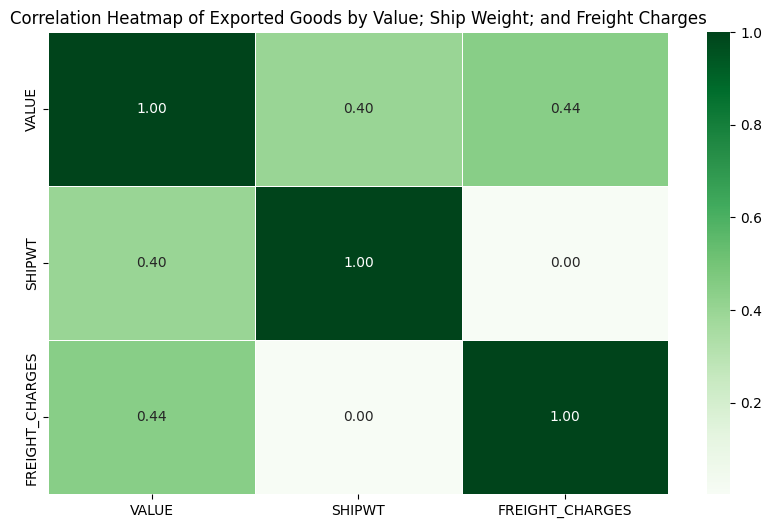

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

import matplotlib.pyplot as plt
# Select relevant columns for correlation analysis
filtered_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']

# Calculate the correlation matrix
correlation_matrix = filtered_data[filtered_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Exported Goods by Value; Ship Weight; and Freight Charges')
plt.show()

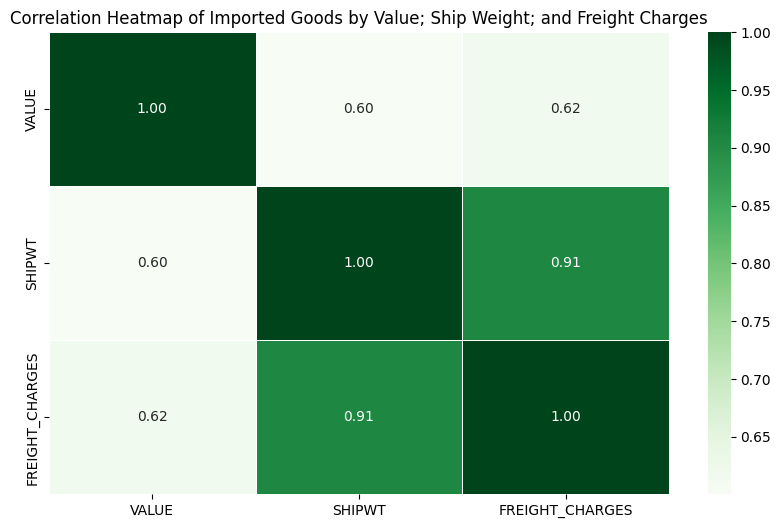

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 2]

import matplotlib.pyplot as plt
# Select relevant columns for correlation analysis
filtered_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']

# Calculate the correlation matrix
correlation_matrix = filtered_data[filtered_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Imported Goods by Value; Ship Weight; and Freight Charges')
plt.show()

## Q3: Which Exported and Imported Goods have the highest Total Value?

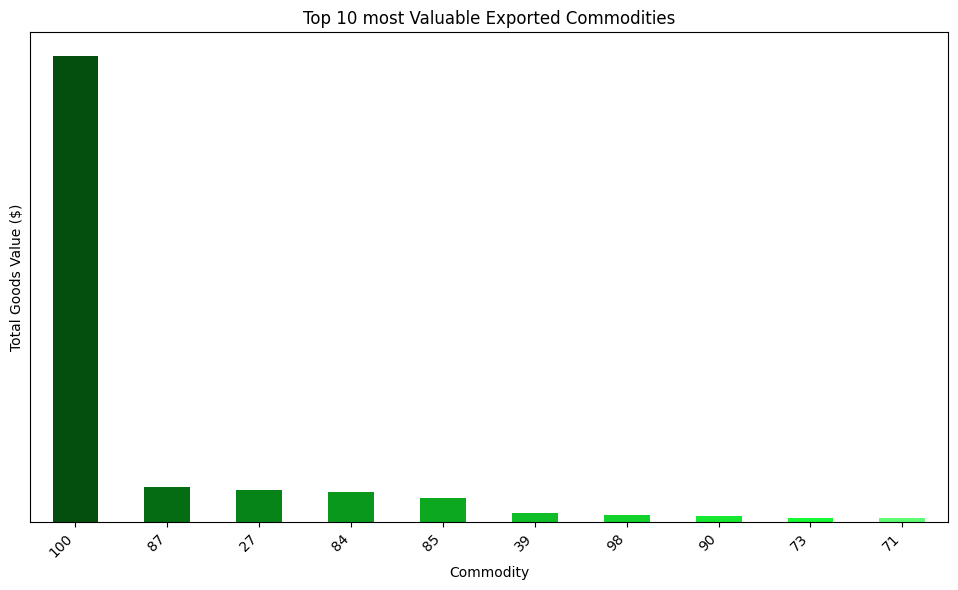

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = data.groupby('COMMODITY2')['VALUE'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 heaviest commodities
plt.figure(figsize=(10, 6))

# Define colors
colors = ['#044f0e', '#056c13', '#078418', '#09971c', '#0ba820', '#0fbd26', '#12d22b', '#16e731', '#16fa34', '#5efb73']

ax = filtered_data.plot(kind='bar', color=[colors[i % 10] for i in range(len(filtered_data))])
plt.title('Top 10 most Valuable Exported Commodities')
plt.xlabel('Commodity')
plt.ylabel('Total Goods Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# remove the y-axis
ax.set_yticks([])

plt.show()

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY2'] != 100].groupby(['COMMODITY2', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(10)

In [ ]:
filtered_data

COMMODITY2  COUNTRY_NAME
27          Mexico          4.163958e+11
            Canada          2.681251e+11
10          Mexico          9.425138e+10
29          Mexico          5.877812e+10
26          Canada          5.469615e+10
72          Mexico          2.043544e+10
12          Mexico          1.791532e+10
25          Canada          1.107975e+10
47          Mexico          6.397099e+09
28          Mexico          6.073472e+09
Name: SHIPWT, dtype: float64

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
commodity_mapping = {
        27 : "Mineral fuels, mineral oils etc",
        10 : "Cereals",
        29 : "Organic chemicals",
        26 : "Ores, slag and ash",
        72 : "Iron and steel",
        12 : "Oil seeds and oleaginous fruits; etc",
        25 : "Salt; Sulfur; Earths and stone; etc",
        47 : "Pulp of wood etc",
        28 : "Inorganic chemicals; etc",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['COMMODITY_NAME'] = data['COMMODITY2'].map(commodity_mapping)

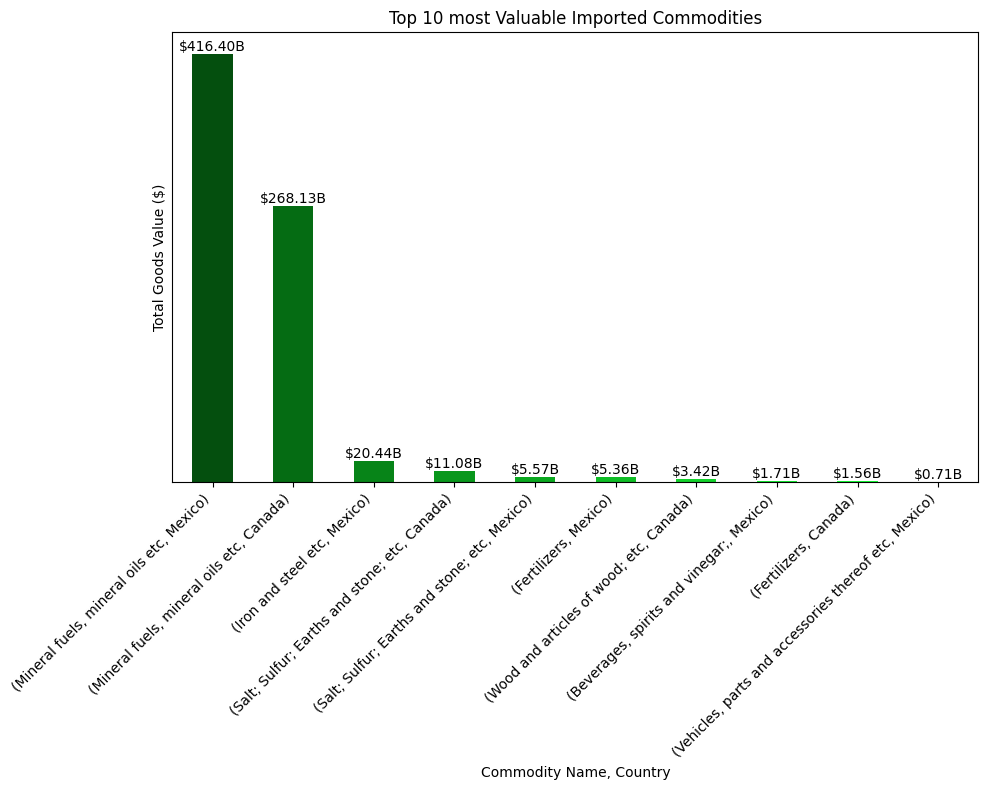

In [ ]:
# Filtering the data to only show Exports from the USA
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY_NAME'] != 100].groupby(['COMMODITY_NAME', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 heaviest commodities
plt.figure(figsize=(10, 8))

# Define colors
colors = ['#044f0e', '#056c13', '#078418', '#09971c', '#0ba820', '#0fbd26', '#12d22b', '#16e731', '#16fa34', '#5efb73']

ax = filtered_data.plot(kind='bar', color=[colors[i % 10] for i in range(len(filtered_data))])
plt.title('Top 10 most Valuable Imported Commodities')
plt.xlabel('Commodity Name, Country')
plt.ylabel('Total Goods Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# remove the y-axis
ax.set_yticks([])

# Add data labels in billions
for i, value in enumerate(filtered_data):
    ax.text(i, value, f'${value/1_000_000_000:,.2f}B', ha='center', va='bottom', fontsize=10)

plt.show()


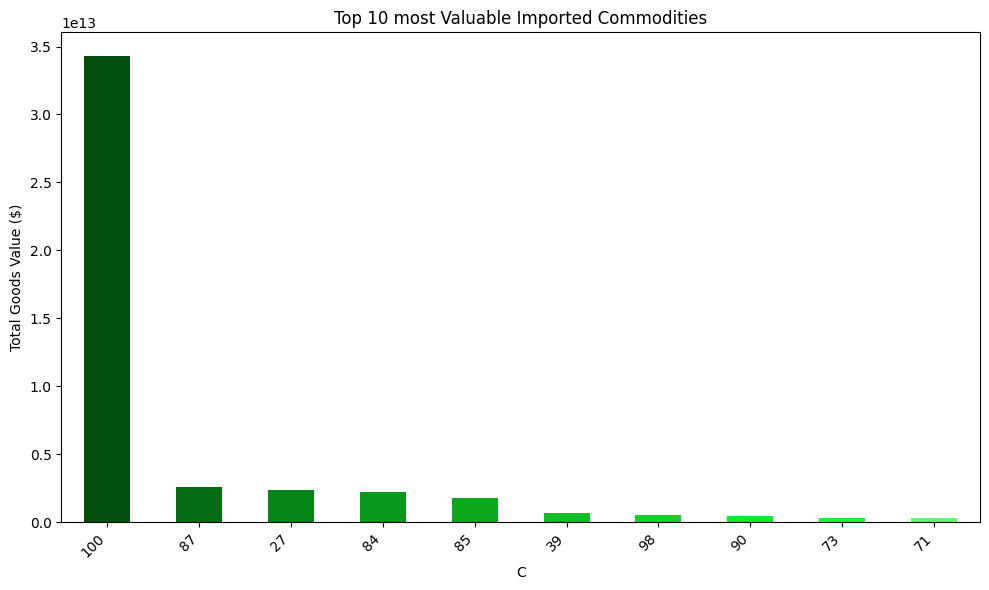

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = data.groupby('COMMODITY2')['VALUE'].sum().sort_values(ascending=False).head(10)

# Plot the top 15 heaviest commodities
plt.figure(figsize=(10, 6))

# Define colors
colors = ['#044f0e', '#056c13', '#078418', '#09971c', '#0ba820', '#0fbd26', '#12d22b', '#16e731', '#16fa34', '#5efb73']

ax = filtered_data.plot(kind='bar', color=[colors[i % 10] for i in range(len(filtered_data))])
plt.title('Top 10 most Valuable Imported Commodities')
plt.xlabel('C')
plt.ylabel('Total Goods Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filtering the data to only show Imports into the USA
filtered_data = data[data['TRDTYPE'] == 2]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY2'] != 100].groupby(['COMMODITY2', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(10)

In [ ]:
filtered_data

COMMODITY2  COUNTRY_NAME
27          Canada          2.730447e+12
            Mexico          5.032693e+11
25          Canada          3.026694e+11
44          Canada          2.168333e+11
25          Mexico          2.109751e+11
31          Canada          1.550455e+11
87          Mexico          1.404875e+11
72          Canada          1.101919e+11
7           Mexico          9.839984e+10
22          Mexico          8.634988e+10
Name: SHIPWT, dtype: float64

In [ ]:
# Mapping dictionary for DISAGMOT to transportation modes
commodity_mapping = {
        27 : "Mineral fuels, mineral oils etc",
        25 : "Salt; Sulfur; Earths and stone; etc",
        44 : "Wood and articles of wood; etc",
        31 : "Fertilizers",
        87 : "Vehicles, parts and accessories thereof etc",
        72 : "Iron and steel etc",
        7 : "Edible vegetables etc",
        22 : "Beverages, spirits and vinegar;",
}

# Create a new column 'TRANSPORT_MODE' by mapping 'DISAGMOT'
data['COMMODITY_NAME'] = data['COMMODITY2'].map(commodity_mapping)

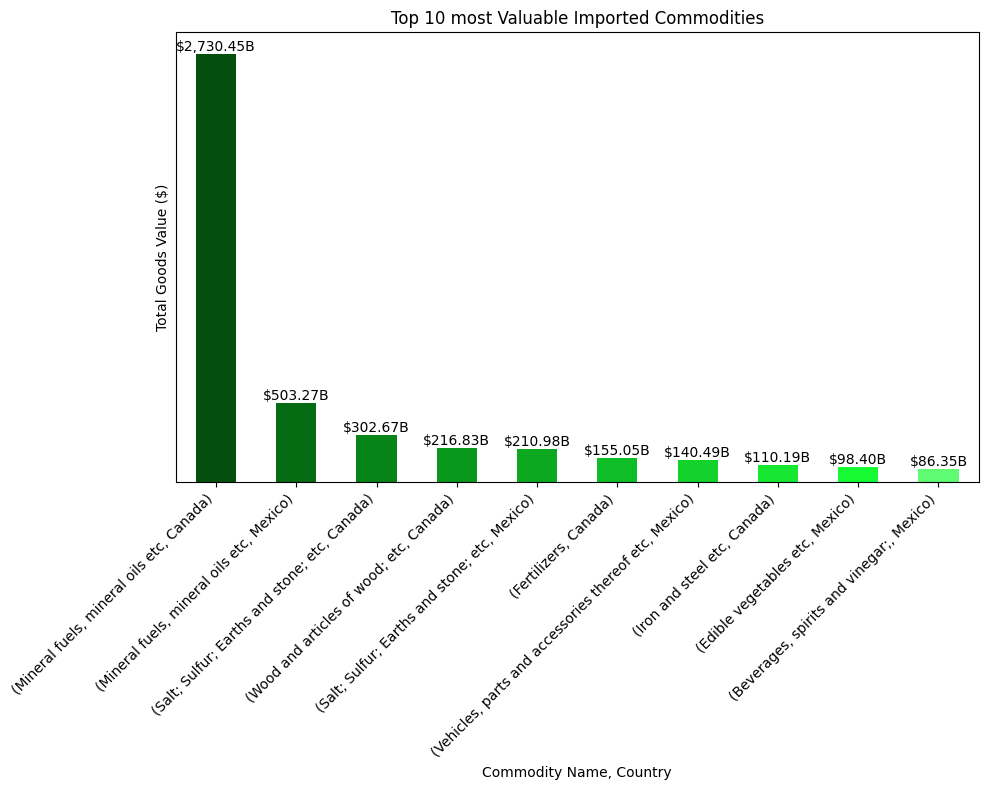

In [ ]:
# Filtering the data to only show Imorts to the USA
filtered_data = data[data['TRDTYPE'] == 2]

# Aggregate SHIPWT by COMMODITY2 and sort in descending order
filtered_data = filtered_data[filtered_data['COMMODITY_NAME'] != 100].groupby(['COMMODITY_NAME', 'COUNTRY_NAME'])['SHIPWT'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 heaviest commodities
plt.figure(figsize=(10, 8))

# Define colors
colors = ['#044f0e', '#056c13', '#078418', '#09971c', '#0ba820', '#0fbd26', '#12d22b', '#16e731', '#16fa34', '#5efb73']

ax = filtered_data.plot(kind='bar', color=[colors[i % 10] for i in range(len(filtered_data))])
plt.title('Top 10 most Valuable Imported Commodities')
plt.xlabel('Commodity Name, Country')
plt.ylabel('Total Goods Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# remove the y-axis
ax.set_yticks([])

# Add data labels in billions
for i, value in enumerate(filtered_data):
    ax.text(i, value, f'${value/1_000_000_000:,.2f}B', ha='center', va='bottom', fontsize=10)

plt.show()


## Q4: How have the Total Annual Freight Charges for Exports and Imports changed over time?

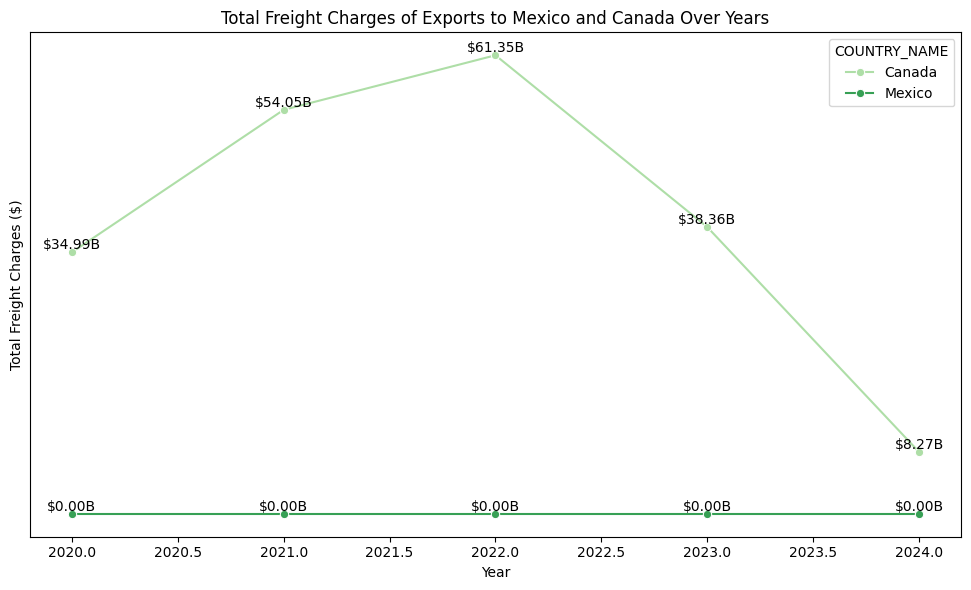

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]

# Group by Year and calculate the sum freight charges
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='COUNTRY_NAME', marker='o', palette='Greens')
plt.title('Total Freight Charges of Exports to Mexico and Canada Over Years')
plt.xlabel('Year')
plt.ylabel('Total Freight Charges ($)')
# Add labels to the data points
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        # Determine label text based on hue (COUNTRY_NAME)
        label_text = f"${y/1_000_000_000:,.2f}B" # Format label

        # You might need to adjust the vertical offset to avoid overlap
        ax.text(x, y, label_text, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# remove the y-axis
ax.set_yticks([])
plt.show()

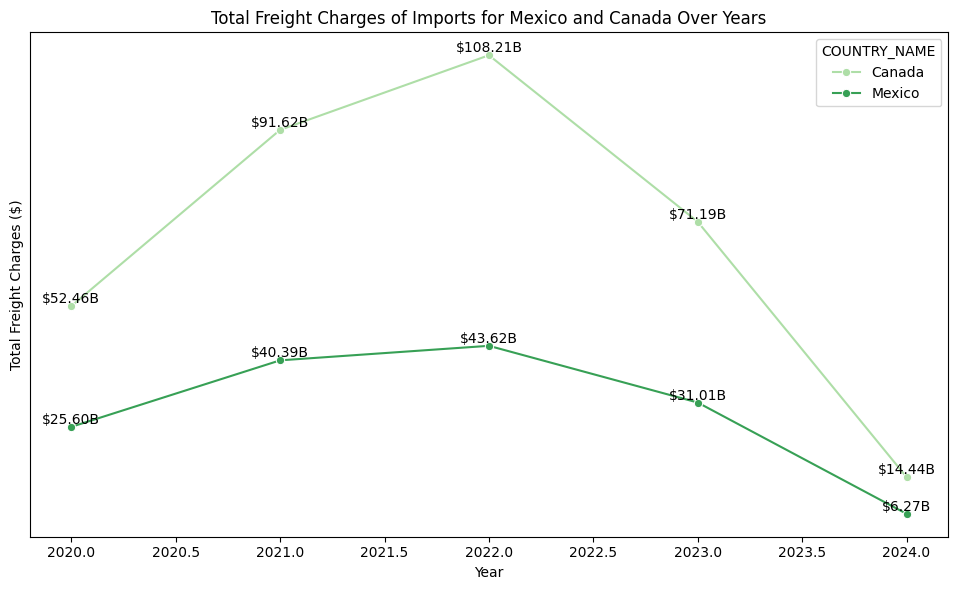

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]

# Group by Year and calculate the sum freight charges
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['FREIGHT_CHARGES'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=filtered_data, x='YEAR', y='FREIGHT_CHARGES', hue='COUNTRY_NAME', marker='o', palette='Greens')
plt.title('Total Freight Charges of Imports for Mexico and Canada Over Years')
plt.xlabel('Year')
plt.ylabel('Total Freight Charges ($)')
# Add labels to the data points
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        # Determine label text based on hue (COUNTRY_NAME)
        label_text = f"${y/1_000_000_000:,.2f}B" # Format label

        # You might need to adjust the vertical offset to avoid overlap
        ax.text(x, y, label_text, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# remove the y-axis
ax.set_yticks([])
plt.show()

## Q5: How has the Total Annual Value of Goods for Exports and Imports changed over time?

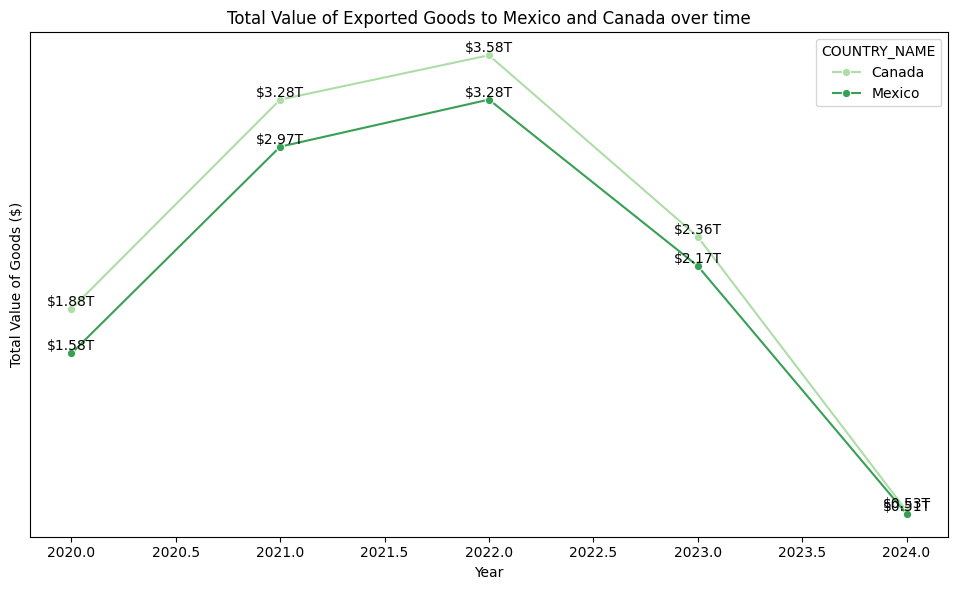

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]

# Group by Year and calculate the sum freight charges
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['VALUE'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=filtered_data, x='YEAR', y='VALUE', hue='COUNTRY_NAME', marker='o', palette='Greens')
plt.title('Total Value of Exported Goods to Mexico and Canada over time')
plt.xlabel('Year')
plt.ylabel('Total Value of Goods ($)')
# Add labels to the data points
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        # Determine label text based on hue (COUNTRY_NAME)
        label_text = f"${y/1_000_000_000_000:,.2f}T" # Format label

        # You might need to adjust the vertical offset to avoid overlap
        ax.text(x, y, label_text, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# remove the y-axis
ax.set_yticks([])
plt.show()

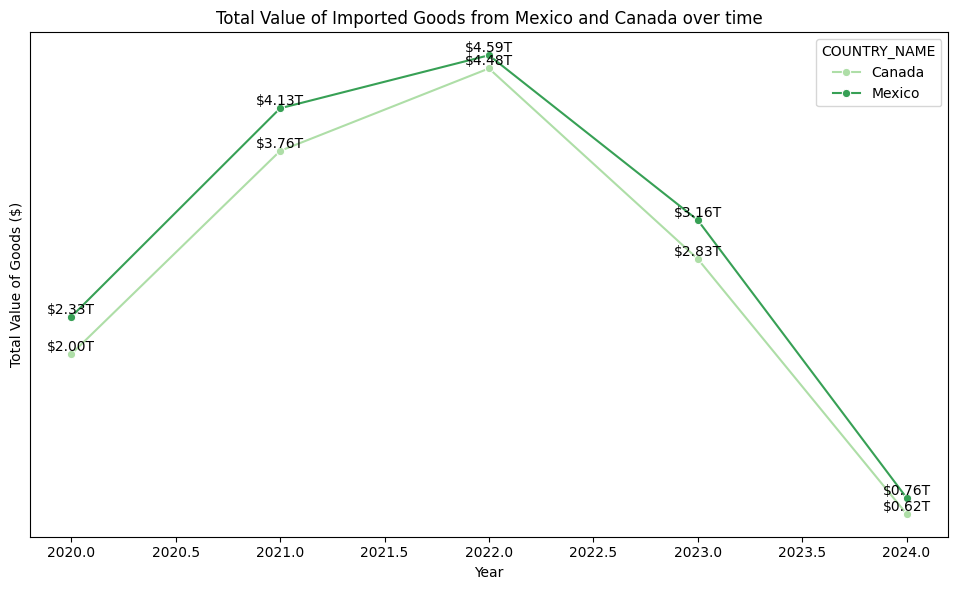

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]

# Group by Year and calculate the sum freight charges
filtered_data = filtered_data.groupby(['COUNTRY_NAME','YEAR'])['VALUE'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=filtered_data, x='YEAR', y='VALUE', hue='COUNTRY_NAME', marker='o', palette='Greens')
plt.title('Total Value of Imported Goods from Mexico and Canada over time')
plt.xlabel('Year')
plt.ylabel('Total Value of Goods ($)')
# Add labels to the data points
for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        # Determine label text based on hue (COUNTRY_NAME)
        label_text = f"${y/1_000_000_000_000:,.2f}T" # Format label

        # You might need to adjust the vertical offset to avoid overlap
        ax.text(x, y, label_text, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# remove the y-axis
ax.set_yticks([])
plt.show()

## Q6: How does the Total Annual Value of Exported and Imported Goods compare with each province/state

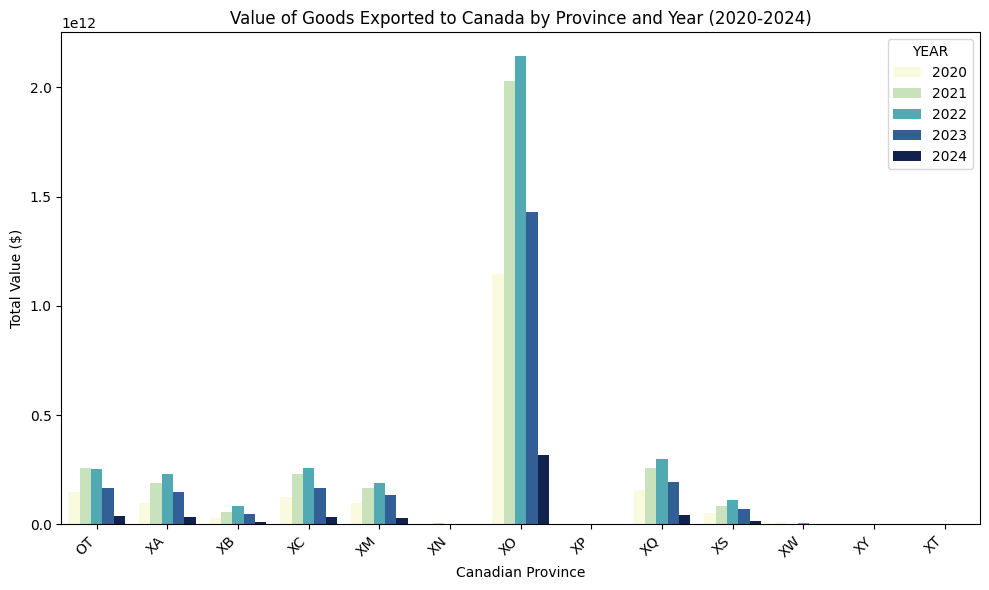

In [ ]:
# Filter for Canada as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods entering Canada)
filtered_data = filtered_data[filtered_data['TRDTYPE'] == 1]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='CANPROV', y='VALUE', hue='YEAR', palette='YlGnBu')
plt.title('Value of Goods Exported to Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

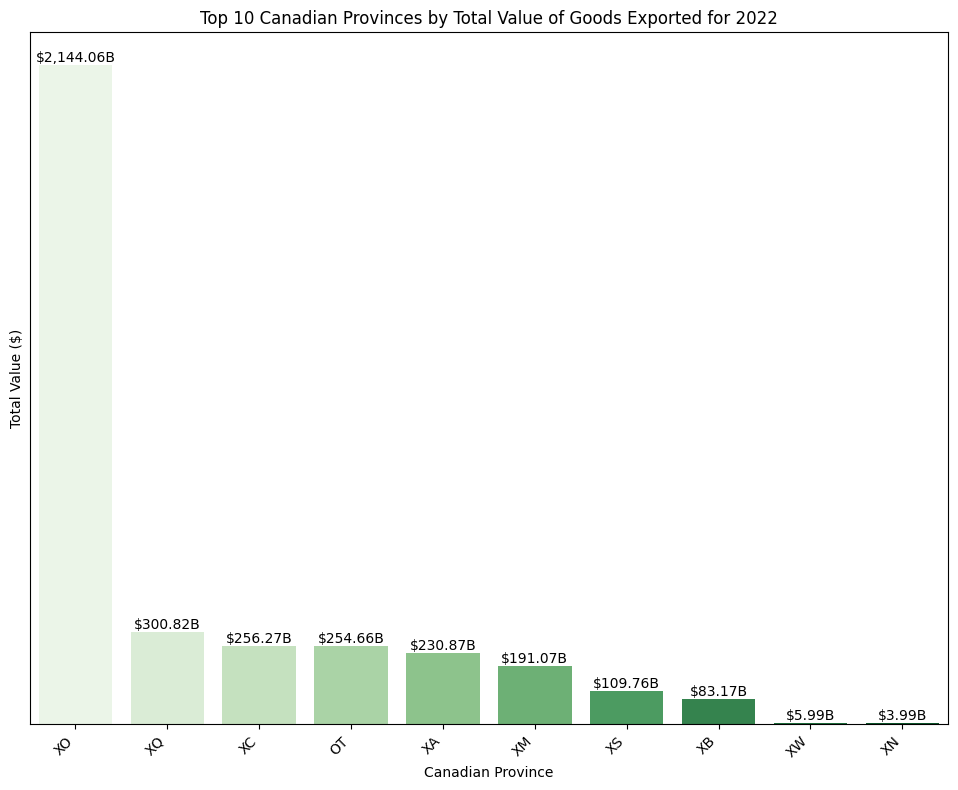

In [ ]:
# Filter for Canada as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods entering Canada)
filtered_data = filtered_data[(filtered_data['TRDTYPE'] == 1) & (filtered_data['YEAR'] == 2022)]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby('CANPROV')['VALUE'].sum().reset_index().sort_values(by='VALUE', ascending=False)[:10]

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=filtered_data, x='CANPROV', y='VALUE', palette='Greens')
plt.title('Top 10 Canadian Provinces by Total Value of Goods Exported for 2022')
plt.xlabel('Canadian Province')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}B', labels=[f'${val/1_000_000_000:,.2f}B' for val in container.datavalues])

# remove the y-axis
ax.set_yticks([])
plt.show()

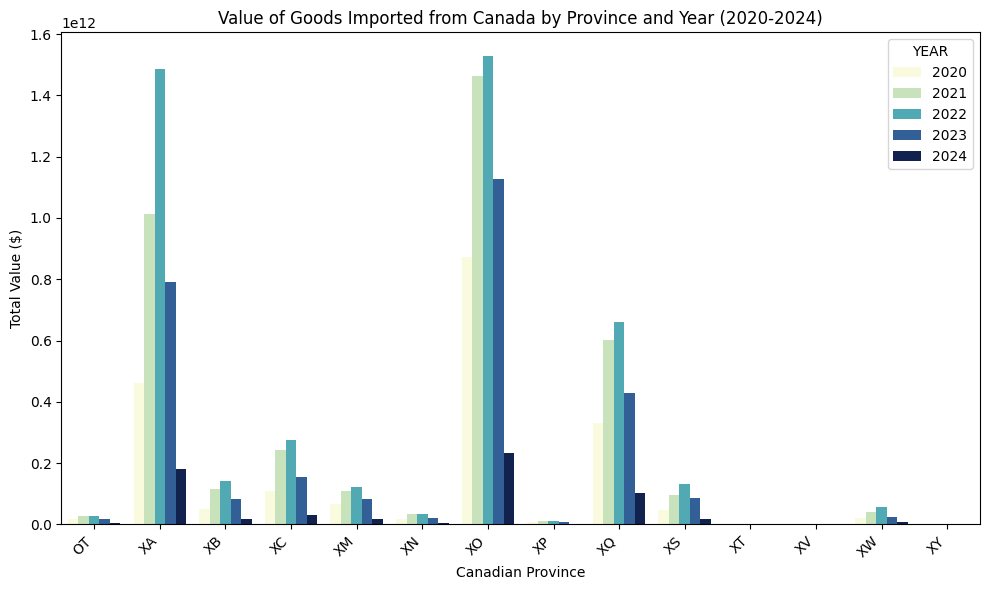

In [ ]:
# Filter for Canada as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods leaving for Canada)
filtered_data = filtered_data[filtered_data['TRDTYPE'] == 2]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='CANPROV', y='VALUE', hue='YEAR', palette='YlGnBu')
plt.title('Value of Goods Imported from Canada by Province and Year (2020-2024)')
plt.xlabel('Canadian Province')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

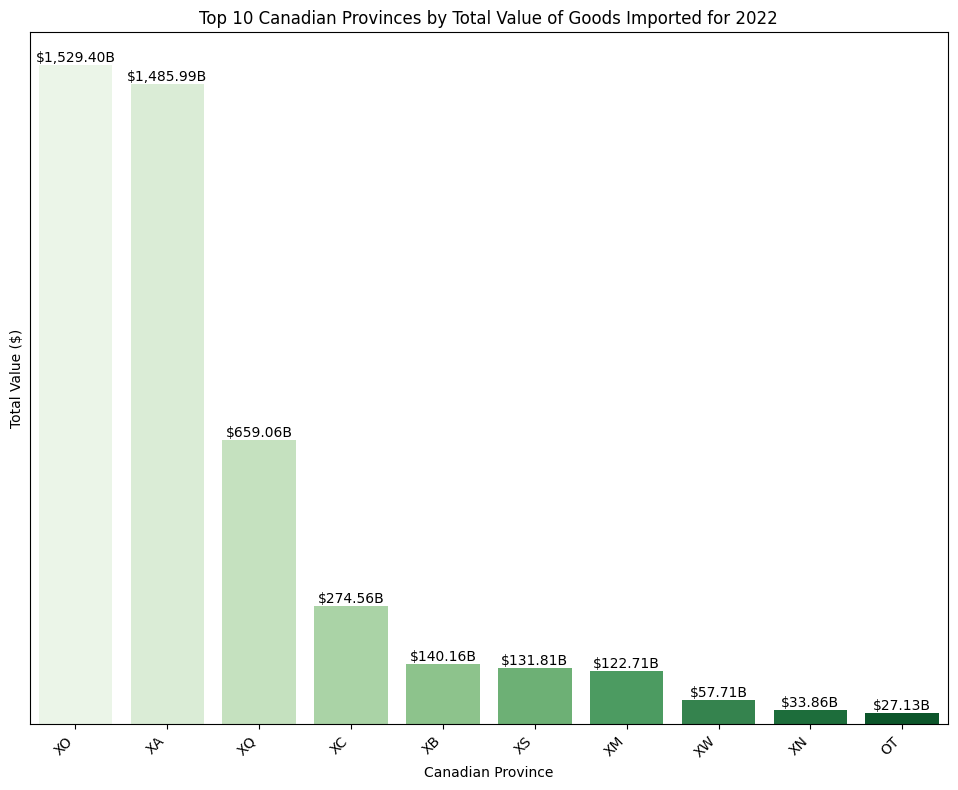

In [ ]:
# Filter for Canada as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Canada']

# Filter for imports (goods leaving for Canada)
filtered_data = filtered_data[(filtered_data['TRDTYPE'] == 2) & (filtered_data['YEAR'] == 2022)]

# Group by YEAR and CANPROV (Canadian province) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby(['YEAR', 'CANPROV'])['VALUE'].sum().reset_index().sort_values(by='VALUE', ascending=False)[:10]

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=filtered_data, x='CANPROV', y='VALUE', palette='Greens')
plt.title('Top 10 Canadian Provinces by Total Value of Goods Imported for 2022')
plt.xlabel('Canadian Province')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}B', labels=[f'${val/1_000_000_000:,.2f}B' for val in container.datavalues])

# remove the y-axis
ax.set_yticks([])
plt.show()

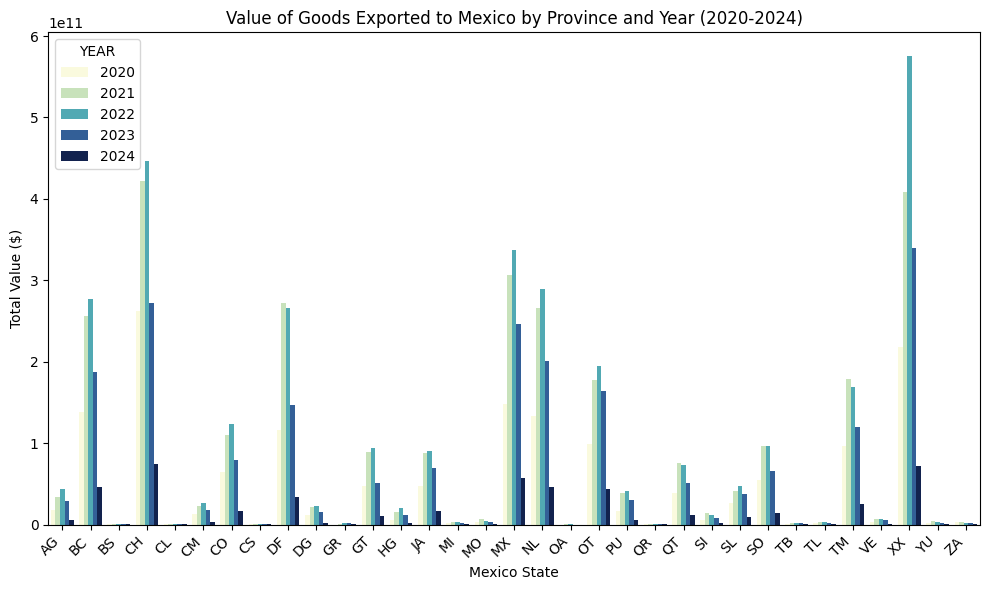

In [ ]:
# Filter for Mexico as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
filtered_data = filtered_data[filtered_data['TRDTYPE'] == 1]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index()

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='MEXSTATE', y='VALUE', hue='YEAR', palette='YlGnBu')
plt.title('Value of Goods Exported to Mexico by Province and Year (2020-2024)')
plt.xlabel('Mexico State')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

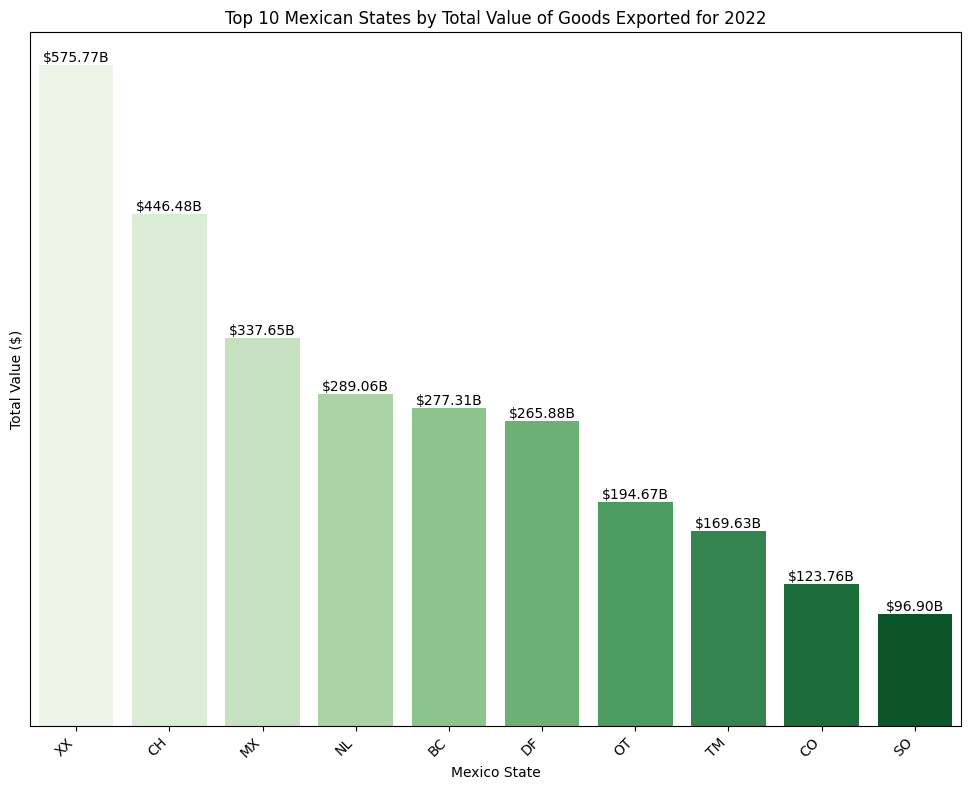

In [ ]:
# Filter for Mexico as the destination country
filtered_data = data[data['COUNTRY_NAME'] == 'Mexico']

# Filter for imports (goods entering Canada)
filtered_data = filtered_data[(filtered_data['TRDTYPE'] == 1) & (filtered_data['YEAR'] == 2022)]

# Group by YEAR and MEXSTATE (Mexico State) and sum the VALUE to get volume by value
filtered_data = filtered_data.groupby(['YEAR', 'MEXSTATE'])['VALUE'].sum().reset_index().sort_values(by='VALUE', ascending=False)[:10]

# Create a bar plot to visualize the import value by Canadian province and year
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=filtered_data, x='MEXSTATE', y='VALUE', palette='Greens')
plt.title('Top 10 Mexican States by Total Value of Goods Exported for 2022')
plt.xlabel('Mexico State')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}B', labels=[f'${val/1_000_000_000:,.2f}B' for val in container.datavalues])

# remove the y-axis
ax.set_yticks([])
plt.show()

## Q7: What is the Trade Volume of Exports and Imports between all the US States and Mexico/Canada?

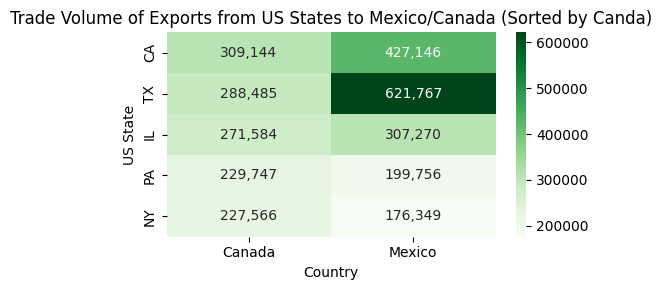

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate data
filtered_data = filtered_data.groupby(['USASTATE', 'COUNTRY_NAME']).size().unstack(fill_value=0)

filtered_data = filtered_data.sort_values(by='Canada', ascending=False)[:5]

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(filtered_data, annot=True, cmap="Greens", fmt=",")
plt.title("Trade Volume of Exports from US States to Mexico/Canada (Sorted by Canda)")
plt.ylabel("US State")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

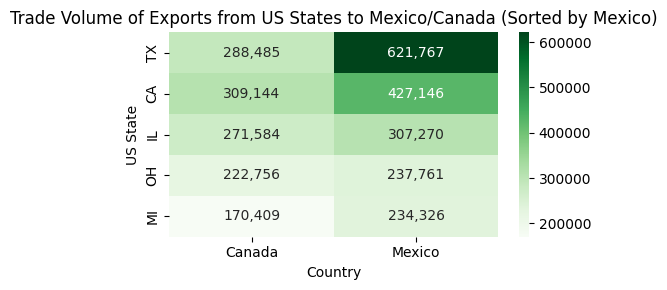

In [ ]:
filtered_data = data[data['TRDTYPE'] == 1]

# Aggregate data
filtered_data = filtered_data.groupby(['USASTATE', 'COUNTRY_NAME']).size().unstack(fill_value=0)

filtered_data = filtered_data.sort_values(by='Mexico', ascending=False)[:5]

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(filtered_data, annot=True, cmap="Greens", fmt=",")
plt.title("Trade Volume of Exports from US States to Mexico/Canada (Sorted by Mexico)")
plt.ylabel("US State")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

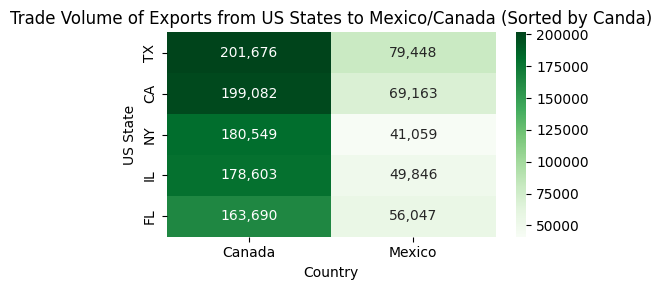

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]

# Aggregate data
filtered_data = filtered_data.groupby(['USASTATE', 'COUNTRY_NAME']).size().unstack(fill_value=0)

filtered_data = filtered_data.sort_values(by='Canada', ascending=False)[:5]

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(filtered_data, annot=True, cmap="Greens", fmt=",")
plt.title("Trade Volume of Exports from US States to Mexico/Canada (Sorted by Canda)")
plt.ylabel("US State")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

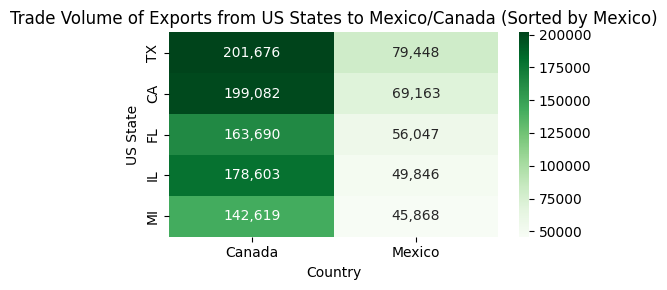

In [ ]:
filtered_data = data[data['TRDTYPE'] == 2]

# Aggregate data
filtered_data = filtered_data.groupby(['USASTATE', 'COUNTRY_NAME']).size().unstack(fill_value=0)

filtered_data = filtered_data.sort_values(by='Mexico', ascending=False)[:5]

# Plot
plt.figure(figsize=(5, 3))
sns.heatmap(filtered_data, annot=True, cmap="Greens", fmt=",")
plt.title("Trade Volume of Exports from US States to Mexico/Canada (Sorted by Mexico)")
plt.ylabel("US State")
plt.xlabel("Country")
plt.tight_layout()
plt.show()